## Desafio 2

Separação das substâncias líquidas da mistura.

Como descrito no desafio 1, nossa mistura consiste em uma um líquido monofásico de água e glicerina (Glicerol). Como apenas um desses pode servir como combustível no ciclo de Rankine, nosso objetivo agora no desafio 2 é separar totalmente a mistura em suas duas substâncias componentes, de maneira a purificar o glicerol.

Mas afinal, quais são as características relevantes da nossa mistura, antes que seja feito essa separação?

### Volume da Mistura

O primeiro ponto a se verificar quando se trata de separações de misturas, é o volume da mesma. Estaremos trabalhando, como foi orientado pelo nosso professor, com a massa total da mistura de uma tonelada, ou 1000 kgs. Uma escolha nossa é que 80% da massa da mistura será composta de glicerina, e apenas 20% será água. Isso será importantíssimo pros cálculos que seguirão.

In [1]:
#Definindo as massas
Massa_Total_Mistura = 1000000 #gramas
Massa_Gly = Massa_Total_Mistura * 0.8 
Massa_Gua = Massa_Total_Mistura * 0.2


#Calculando a quantidade de moléculas em mol
peso_molecular_gly = 92.09382
#800kg = x * 92.09382 g/mol
x = Massa_Gly / (92.09382)
print("A quantidade em mol de glicerina na mistura é", x)

peso_molecular_gua = 18.01528
#200kg = y * 18.01528 g/mol
y = Massa_Gua / (18.01528)
print("e a quantidade em mol de água é", y)


#Calculando a fração molar de cada substância:
Quantidade_Total_Mistura_Mols = x + y
print()
print("A quantidade de mols de molécula nessa mistura então são", Quantidade_Total_Mistura_Mols)

Fração_Molar_Gly = x / Quantidade_Total_Mistura_Mols
Fração_Molar_Gua = y / Quantidade_Total_Mistura_Mols

print()
print("A fração molar de glicerol e água nessas moléculas então são em porcentagem, respectivamente:")
print(Fração_Molar_Gly * 100)
print(Fração_Molar_Gua * 100)
densidade_da_mistura_80_glycerol = 1.20240

A quantidade em mol de glicerina na mistura é 8686.793532942818
e a quantidade em mol de água é 11101.687012358398

A quantidade de mols de molécula nessa mistura então são 19788.480545301216

A fração molar de glicerol e água nessas moléculas então são em porcentagem, respectivamente:
43.89823419264751
56.101765807352486


Agora que já temos as informações acima, podemos calcular finalmente o volume molar da nossa substância, e assim descobrir o volume total de nossa mistura.

Sabe-se que, o volume molar de uma mistura líquida pode ser dado por:  

$$ V_{por mol} = \frac{x_1 mw_1 + (1 - x_1)mw_2}{\rho_{mistura (x_1)}} $$  

Onde:  
**x1** é a fração molar da substância 1 na mistura (enquanto 1 - x1 é igual a x2, pois são números complementares);  
**mw** significa molecular weight, e portanto se refere ao peso molecular das substâncias 1 ou 2;
**"rho"** se refere à densidade da mistura, que é um número empírico e então foi procurado na literatura.

Então, podemos definir e aplicar a função para a nossa mistura:

In [2]:
#Primeiramente, definindo a constante 
densidade_da_mistura = 1.20240 ## https://www.researchgate.net/figure/Densities-g-cm-3-for-glycerol-water-mixtures-at-various-temperatures-16-G_tbl1_235754346

def volume_mistura(fracao1, fracao2, peso_mol_1, peso_mol_2, densidade_da_mistura):
    volume = ((fracao1 * peso_mol_1) + ((fracao2) * peso_mol_2)) / densidade_da_mistura
    
    return volume

In [3]:
#Agora, finalmente, o volume molar:
print("o volume em mol da mistura é",volume_mistura(Fração_Molar_Gly,Fração_Molar_Gua,peso_molecular_gly,peso_molecular_gua,densidade_da_mistura), "ml/mol")

o volume em mol da mistura é 42.02798650673159 ml/mol


Agora, para descobrir o volume total da mistura, é necessário apenas multiplicar a quantidade em mol da mistura total com esse volume molar.

In [4]:
print("Assim, finalmente descobrimos que o volume de nossa mistura é de", volume_mistura(Fração_Molar_Gly,Fração_Molar_Gua,peso_molecular_gly,peso_molecular_gua,densidade_da_mistura) * 0.001 * Quantidade_Total_Mistura_Mols,"Litros.")

Assim, finalmente descobrimos que o volume de nossa mistura é de 831.6699933466401 Litros.


Essa resposta é bastante coerente. Sabemos que Glicerina é mais denso que a água e, logo, a mistura com certeza ocuparia menos de 1000 litros (menos que um metro³). Uma coisa importante de se ressaltar é que pegamos a densidade da mistura para a temperatura de 303.15K (30 graus Celsius), e para a pressão atmosférica de 1 atm. 

### Pressão de vapor e idealidade da mistura

Uma questão muito importante surge quando analisamos as pressões de vapor de solvente puro da água e da glicerina. Ambas as substâncias não são voláteis por serem moléculas polares capazes de formar ligações de hidrogênio. O glicerol, em especial, constitui-se de três grupos hidroxilas que aumentam ainda mais a interações entre suas moléculas e as de água. Nesse sentido, quando se analisa os valores empíricos dessas pressões, pode-se ver que a glicerina em especial tem sua pressão de vapor de solvente puro próxima ao valor zero.

Pressões de vapor de solvente puro:  
Água: 3173.073 Pa  
Glycerol: 0.0106 Pa  

Por causa disso, se usarmos a **Lei de Raoult** para verificar a pressão de vapor segundo a idealidade da mistura, iremos perceber que ela não pode ser real. 
Mas afinal, o que define uma mistura como sendo ideal ou não ideal?

Considerando que a pressão de vapor da água é de 23.8 mmHg

In [5]:
# Import das bibliotecas
from matplotlib import pyplot as plt

In [6]:
# Definindo as funções
def raoult(x,p):
    Raoult = x * p
    return Raoult

def fazedor_de_retas(x,lista):
    lista_nova = []
    for i in lista:
        lista_nova.append(raoult(i,x))
    return lista_nova

In [7]:
#Constantes:
Vapor_Pressure_Gly = 0000.0106 #KPascal
Vapor_Pressure_Gua = 3173.073 #KPascal

lista_frações_molares = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

Valores_Pressoes_Gly = fazedor_de_retas(Vapor_Pressure_Gly,lista_frações_molares)
Valores_Pressoes_Gua = fazedor_de_retas(Vapor_Pressure_Gua,lista_frações_molares)

Valores_Pressoes_Gua.reverse()

print(Valores_Pressoes_Gly)
print()
print(Valores_Pressoes_Gua)                          
    

[0.0, 0.00106, 0.00212, 0.00318, 0.00424, 0.0053, 0.00636, 0.0074199999999999995, 0.00848, 0.00954, 0.0106]

[3173.073, 2855.7657, 2538.4584, 2221.1510999999996, 1903.8437999999999, 1586.5365, 1269.2292, 951.9218999999999, 634.6146, 317.3073, 0.0]


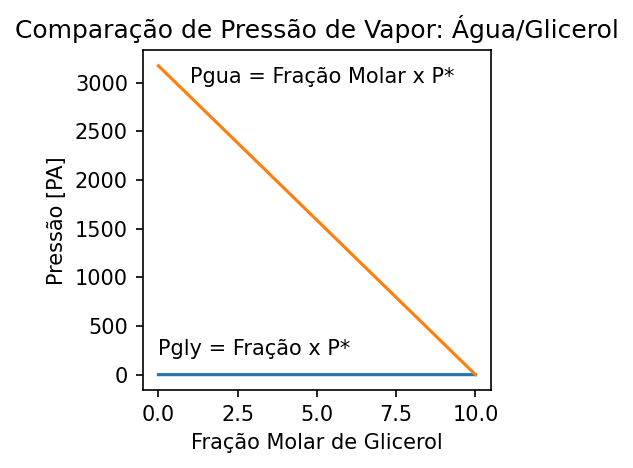

In [8]:
#Plotando o gráfico.
fig, axe = plt.subplots(ncols=1, nrows=1, figsize=(3, 3), dpi=150,)
axe.plot(Valores_Pressoes_Gly)
axe.plot(Valores_Pressoes_Gua)
plt.text(0, 200, "Pgly = Fração x P*")
plt.text(1, 3000, "Pgua = Fração Molar x P*")
plt.title("Comparação de Pressão de Vapor: Água/Glicerol")
plt.xlabel('Fração Molar de Glicerol')
plt.ylabel('Pressão [PA]')
plt.show()

<figcaption> $ \textbf{Fig. 1:}$ Gráfico de comparação entre as retas da lei de raoult aplicado para água, em laranja, e para glicerol, em azul. </figcaption>
</dt>

Esse gráfico nos mostra de certa forma, um absurdo. Nenhum gráfico de Lei de Raoult convencional deveria ser desse jeito. Como foi dito acima, a pressão de vapor do Glicerol é quase nulo, e a pressão de água, mesmo sendo baixa em relação a outros compostos mais voláteis, ainda é muito mais significativo. Por causa disso, não faz sentido somar um ao outro pra conseguir a Pressão de Vapor da mistura, pois ela será totalmente guiada pela fração molar da água.  
  
Assim, podemos entender também que essa mistura está longe de ser ideal. Uma mistura ideal é aquela que pode ser resolvida dentro da Lei de Raoult. Podemos ver a curva real da pressão de vapor em um gráfico isotérmico de diagrama de fases:

<center>
<img src = "Diagrama de Faze.png" style="width:400px;height:400px">
<figcaption> $ \textbf{Fig. 2:}$ O diagrama de fases binário isotérmico. Nele, podemos ver para a temperatura constante de 25 graus, o comportamento da pressão de vapor da mistura (dados em quilopascal, no eixo y) pela fração molar da glicerina.  </figcaption>
</center>
</dt>
  
  
Agora que já temos isso, podemos finalmente partir para a separação da mistura, e será utilizada a regra da alavanca.

### Regra da Alavanca para separação das misturas

Primeiramente, faremos uma mudança em relação as condições apresentadas no primeiro desafio. Lá, haviamos usado a condição isobárica de 8 atm para a construção do diagrama de fases. Isso se mostrou complicado pois aumenta a temperatura em que ocorreria a vaporização. Infelizmente, apesar de não inviabilizar a regra da alavanca, em altas temperaturas a glicerina começa a se decompor por desidratação e se transforma em acroleína. Por causa disso, precisamos diminuir muito a pressão externa no sistema, mais especificamente trabalharemos com a pressão externa de 0.5 atm.

Além disso, uma decisão muito importante para se fazer é fração da água e glicerol em nossa mistura. Uma primeira consideração é que nossa substância alvo é o glicerol, então nossa mistura deve tender a ter mais glicerina do que água. Escolhemos então 80% de massa da mistura ser glicerina e 20% água. Vendo no nosso diagrama de fases abaixo, percebe-se que essa concentração nos ajuda convenientemente a separar as duas substâncias em apenas um ciclo de destilação.

<center>
<img src = "Regra da Lavanca.png" style="width:400px;height:400px">
<figcaption> $ \textbf{Fig. 3:}$ Diagrama de fases isobárico da mistura binária de água e glicerol. A pressão externa é 0.5 atm, e selecionamos a fração molar de água como aproximadamente 0.56 mol por 1 mol da mistura. Essa seleção é o corte vermelho escuro e podemos ver que a regra da alavanca, aplicada pela linha verde, nos mostra que a água é completamente evaporada da mistura.  </figcaption>
</center>
</dt>

Como se pode ver, quase toda a água evapora e a glicerina permanece inalterada. Isso se deve a grande diferença de ebulição das duas misturas, e também a quase nula volatilidade do glicerol. Na realidade, extrair e separar toda água da glicerina em um sistema real é impossível não só porque sempre haverá resquícios de água que não evaporou, mas a glicerina é uma substância muito higroscópica, absorvendo o vapor de água do ambiente com tremenda facilidade.
